Synthetic data

1500 instances - 0 or 1 - binary problem

class 1 3 Gaussian distribution - [6,14], [10,6][14,14]

class 0 - Uniform distribution - 20


In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt


In [3]:
#matplotlib inline

In [4]:
from numpy.random import random

In [5]:
N=1500

In [6]:
mean1=[6,14]

In [7]:
mean2=[10,6]

In [8]:
mean3=[14,14]

In [9]:
cov=[[3.5, 0],[0,3.5]]

In [10]:
cov

[[3.5, 0], [0, 3.5]]

In [11]:
np.random.seed(50)

In [12]:
X=np.random.multivariate_normal(mean1,cov, int(N/6))

In [13]:
X.shape

(250, 2)

In [14]:
X[0]

array([ 3.0808485 , 13.94204621])

In [15]:
X[:,1].sum()

3447.8139448036873

In [16]:
3447.8139448036873/250

13.79125577921475

In [17]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [18]:
X.shape

(500, 2)

In [19]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [20]:
X.shape

(750, 2)

In [21]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [22]:
X.shape

(1500, 2)

In [23]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [24]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [25]:
y

array([1., 1., 1., ..., 0., 0., 0.])

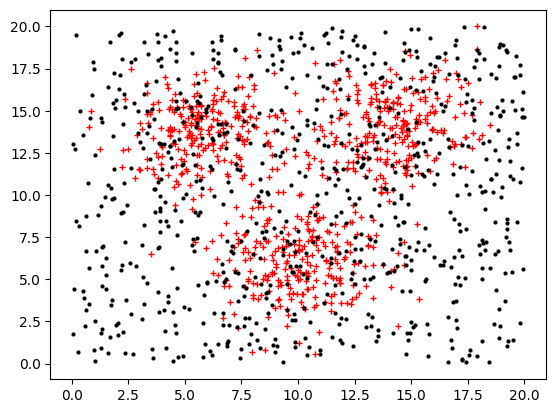

In [26]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [27]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [28]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [29]:
# your work = to create DT using the data here!

In [30]:
from sklearn import tree

In [31]:
clf = tree.DecisionTreeClassifier(max_depth=3)

In [32]:
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

In [33]:
clf

DecisionTreeClassifier(max_depth=3)

In [34]:
import pydotplus

In [35]:
from IPython.display import Image

In [36]:
dot_data=tree.export_graphviz(clf,feature_names=['Feature 1', 'Feature 2'], class_names=['Class 0', 'Class 1'],filled=True,out_file=None)

In [37]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Feature 2 <= 3.217\\ngini = 0.5\\nsamples = 1500\\nvalue = [750, 750]\\nclass = Class 0", fillcolor="#ffffff"] ;\n1 [label="Feature 1 <= 6.684\\ngini = 0.173\\nsamples = 136\\nvalue = [123, 13]\\nclass = Class 0", fillcolor="#e88e4e"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 40\\nvalue = [40, 0]\\nclass = Class 0", fillcolor="#e58139"] ;\n1 -> 2 ;\n3 [label="Feature 1 <= 11.479\\ngini = 0.234\\nsamples = 96\\nvalue = [83, 13]\\nclass = Class 0", fillcolor="#e99558"] ;\n1 -> 3 ;\n4 [label="gini = 0.38\\nsamples = 47\\nvalue = [35, 12]\\nclass = Class 0", fillcolor="#eeac7d"] ;\n3 -> 4 ;\n5 [label="gini = 0.04\\nsamples = 49\\nvalue = [48, 1]\\nclass = Class 0", fillcolor="#e6843d"] ;\n3 -> 5 ;\n6 [label="Feature 2 <= 17.465\\ngini = 0.497\\nsamples = 1364\\nvalue = [627, 737]\\nclass = Class 1", fillc

In [38]:
graph=pydotplus.graph_from_dot_data(dot_data)

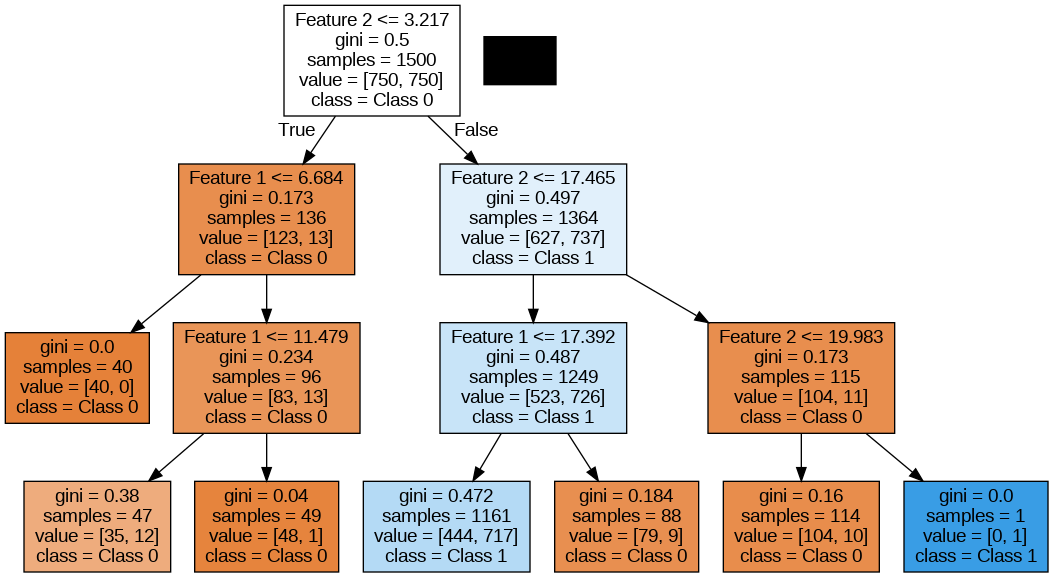

In [39]:
graph
Image(graph.create_png())

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=11)

In [42]:
X_test.shape

(300, 2)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
MaxDepth = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55]

In [45]:
MaxDepth = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55]

In [46]:
trainAccuracy =  np.zeros(len(MaxDepth))

In [47]:
trainAccuracy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [48]:
testAccuracy=np.zeros(len(MaxDepth))

In [49]:
testAccuracy

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [50]:
index = 0

In [51]:
for depth in MaxDepth:
  clf = tree.DecisionTreeClassifier (max_depth = depth)
  clf = clf.fit(X_train, y_train)
  y_predictTrain = clf.predict(X_train)
  y_predictTest = clf.predict(X_test)
  trainAccuracy[index] = accuracy_score(y_train, y_predictTrain)
  testAccuracy[index] = accuracy_score(y_test, y_predictTest)
  index +=1

In [52]:
testAccuracy

array([0.63333333, 0.68333333, 0.73      , 0.74333333, 0.71666667,
       0.71333333, 0.72333333, 0.71      , 0.7       , 0.67      ,
       0.64333333, 0.64333333, 0.64      , 0.65666667, 0.65333333,
       0.64666667, 0.64333333, 0.63666667])

In [53]:
trainAccuracy

array([0.63416667, 0.6875    , 0.7225    , 0.7275    , 0.75833333,
       0.79416667, 0.8025    , 0.83      , 0.84583333, 0.94833333,
       0.98666667, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        ])

Text(0.5, 0, 'Accuracy')

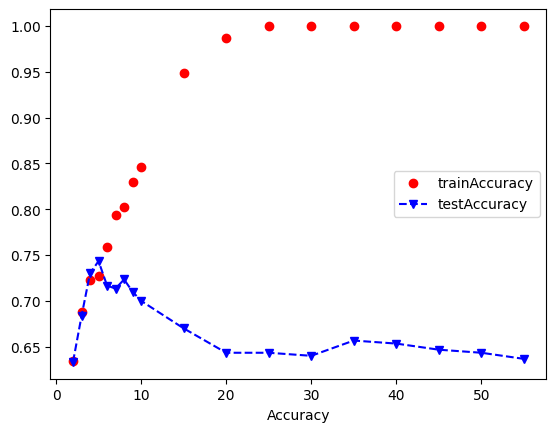

In [54]:
#
plt.plot(MaxDepth, trainAccuracy, 'ro', MaxDepth, testAccuracy, 'bv--')
plt.legend(['trainAccuracy', 'testAccuracy'])
plt.xlabel('MaxDepth')
plt.xlabel('Accuracy')